<a href="https://colab.research.google.com/github/Rishavraj62344/Stock-Price-prediction-by-simple-RNN-and-LSTM/blob/main/Stock_Price_Prediction_Project_using_LSTM_and_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
data = pd.read_csv("/content/TESLA.csv")

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [15]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 253
Train data length : 177
Validation data lenth : 76


In [16]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2021-09-29,259.933319
1,2021-09-30,260.333344
2,2021-10-01,259.466675
3,2021-10-04,265.500000
4,2021-10-05,261.600006
...,...,...
172,2022-06-06,244.353333
173,2022-06-07,234.000000
174,2022-06-08,240.086670
175,2022-06-09,249.339996


In [17]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
177,2022-06-13,223.166672
178,2022-06-14,218.286667
179,2022-06-15,220.916672
180,2022-06-16,222.736664
181,2022-06-17,213.433334
...,...,...
248,2022-09-23,283.089996
249,2022-09-26,271.829987
250,2022-09-27,283.839996
251,2022-09-28,283.079987


In [18]:
dataset_train = train_data.Open.values
dataset_train.shape

(177,)

In [19]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(177, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(177, 1)

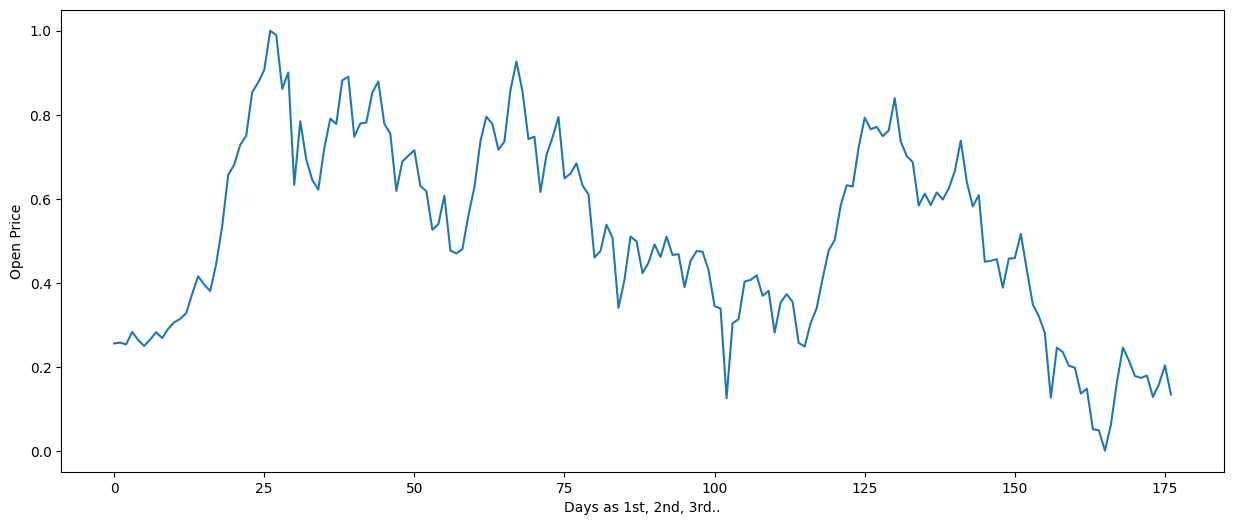

In [21]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [22]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (127, 50)
Shape of y_train before reshape : (127,)


In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (127, 50, 1)
Shape of y_train after reshape : (127, 1)


In [25]:
X_train[0]

array([[0.25542119],
       [0.25738672],
       [0.25312833],
       [0.2827732 ],
       [0.2636105 ],
       [0.24952505],
       [0.26469147],
       [0.28229816],
       [0.26827825],
       [0.29002877],
       [0.30565389],
       [0.31387573],
       [0.32738792],
       [0.37332938],
       [0.41548748],
       [0.39553859],
       [0.38022477],
       [0.44491942],
       [0.53504974],
       [0.65651201],
       [0.68103059],
       [0.72795466],
       [0.75014738],
       [0.85356061],
       [0.87708008],
       [0.90651203],
       [1.        ],
       [0.98950149],
       [0.86140593],
       [0.90040296],
       [0.63312375],
       [0.78439463],
       [0.69387115],
       [0.64494886],
       [0.62149507],
       [0.72009299],
       [0.79058572],
       [0.77800712],
       [0.88194442],
       [0.89042852],
       [0.7477398 ],
       [0.77898973],
       [0.78147933],
       [0.85252882],
       [0.87927473],
       [0.77831826],
       [0.75494634],
       [0.618

In [26]:
y_train[0]

array([0.7153924])

Creating RNN models.[link text](**https://**)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
4/4 [==============================] - 4s 56ms/step - loss: 1.0552 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 45ms/step - loss: 0.5321 - accuracy: 0.0079
Epoch 3/50
4/4 [==============================] - 0s 51ms/step - loss: 0.5685 - accuracy: 0.0079
Epoch 4/50
4/4 [==============================] - 0s 48ms/step - loss: 0.5378 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 45ms/step - loss: 0.4211 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 0.5121 - accuracy: 0.0079
Epoch 7/50
4/4 [==============================] - 0s 50ms/step - loss: 0.4639 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 54ms/step - loss: 0.4716 - accuracy: 0.0079
Epoch 9/50
4/4 [==============================] - 0s 43ms/step - loss: 0.3576 - accuracy: 0.0079
Epoch 10/50
4/4 [==============================] - 0s 47ms/step - loss: 0.3568 - accuracy: 0.0079
Epoch 11/50
4

# Evaluation Model

In [28]:
history.history["loss"]

[1.055181622505188,
 0.532101571559906,
 0.5684501528739929,
 0.537775456905365,
 0.4211236834526062,
 0.5121027827262878,
 0.4639226794242859,
 0.47161680459976196,
 0.3575804531574249,
 0.3568342328071594,
 0.31512361764907837,
 0.46462082862854004,
 0.4246123135089874,
 0.4229731559753418,
 0.4213854670524597,
 0.4816319942474365,
 0.40618032217025757,
 0.3323897123336792,
 0.30146610736846924,
 0.265962153673172,
 0.2293490618467331,
 0.31436511874198914,
 0.2881927490234375,
 0.30714064836502075,
 0.27520492672920227,
 0.25952622294425964,
 0.2631309926509857,
 0.23983395099639893,
 0.32225072383880615,
 0.2681017816066742,
 0.18361330032348633,
 0.261777400970459,
 0.18999753892421722,
 0.1957506239414215,
 0.2699853181838989,
 0.22515572607517242,
 0.30772677063941956,
 0.2028394341468811,
 0.1715017855167389,
 0.13234935700893402,
 0.21854989230632782,
 0.12332235276699066,
 0.17318853735923767,
 0.19981499016284943,
 0.17682905495166779,
 0.17205432057380676,
 0.14366556704044

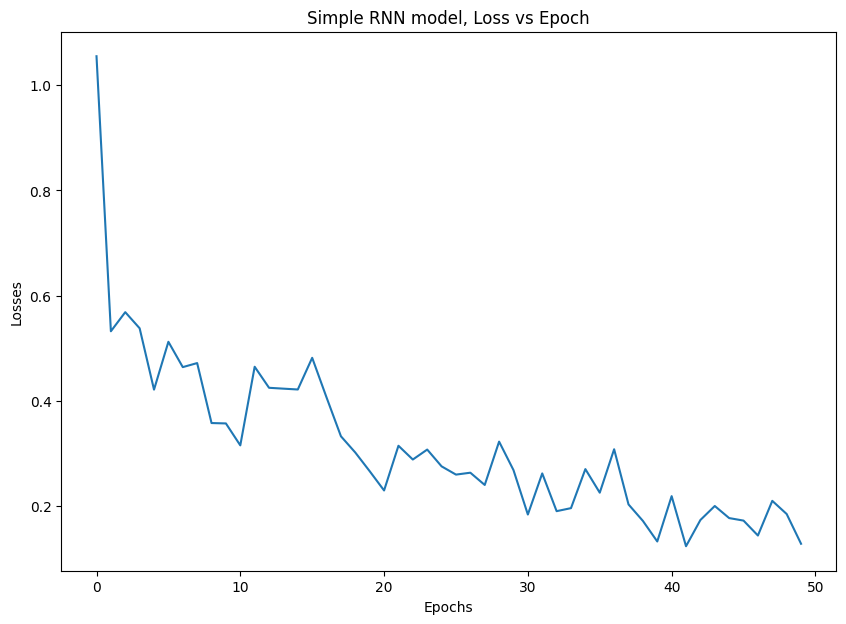

In [29]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

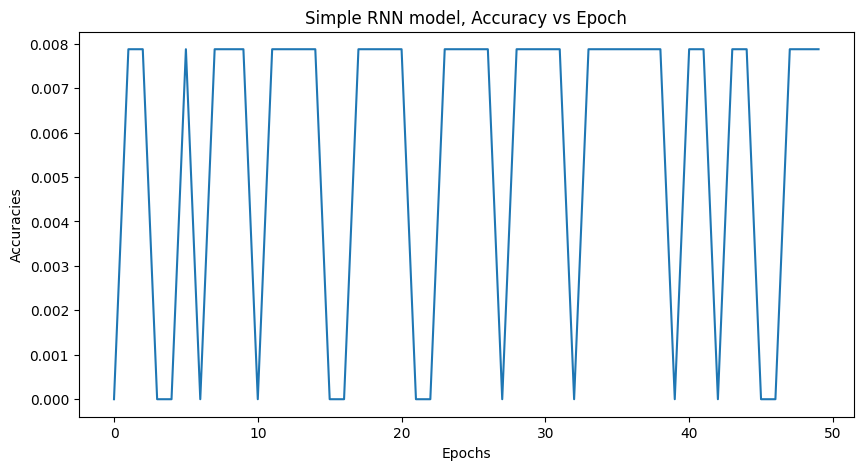

In [30]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [31]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

4/4 [==============================] - 1s 13ms/step


(127, 1)

In [32]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(127, 1)

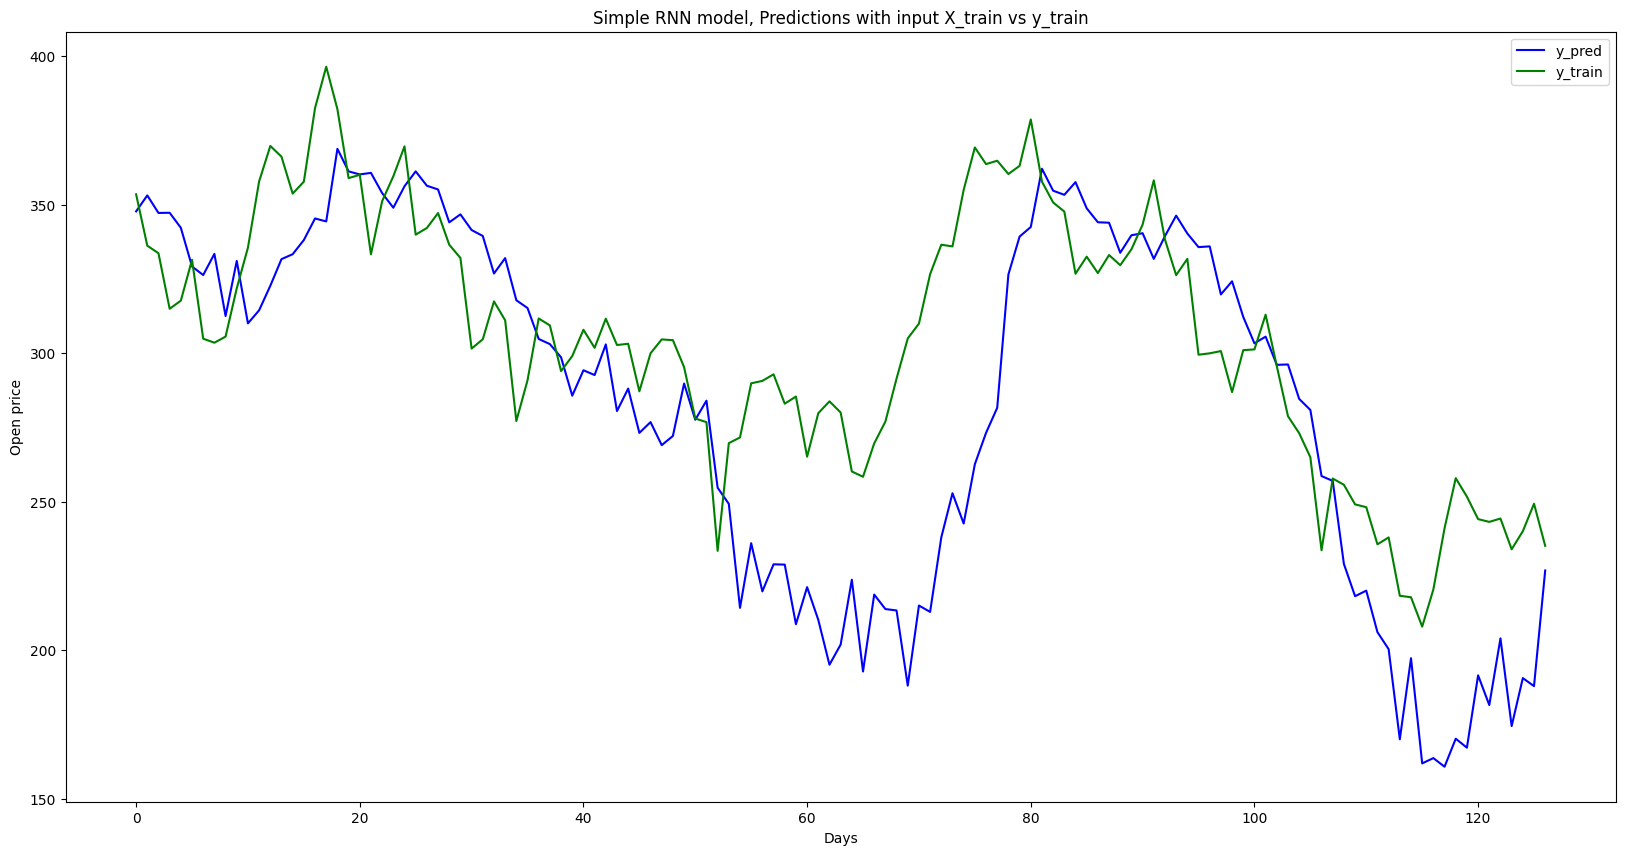

In [34]:
plt.figure(figsize = (20,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

Creating Test Dataset from Validation Data

In [35]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (76, 1)


In [36]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [37]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (26, 50)
Shape of y_test before reshape : (26,)


In [39]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))

In [40]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (26, 50, 1)
Shape of y_test after reshape : (26, 1)


.Evaluating with Validation Data

In [41]:
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

1/1 [==============================] - 0s 39ms/step
Shape of y_pred_of_test : (26, 1)


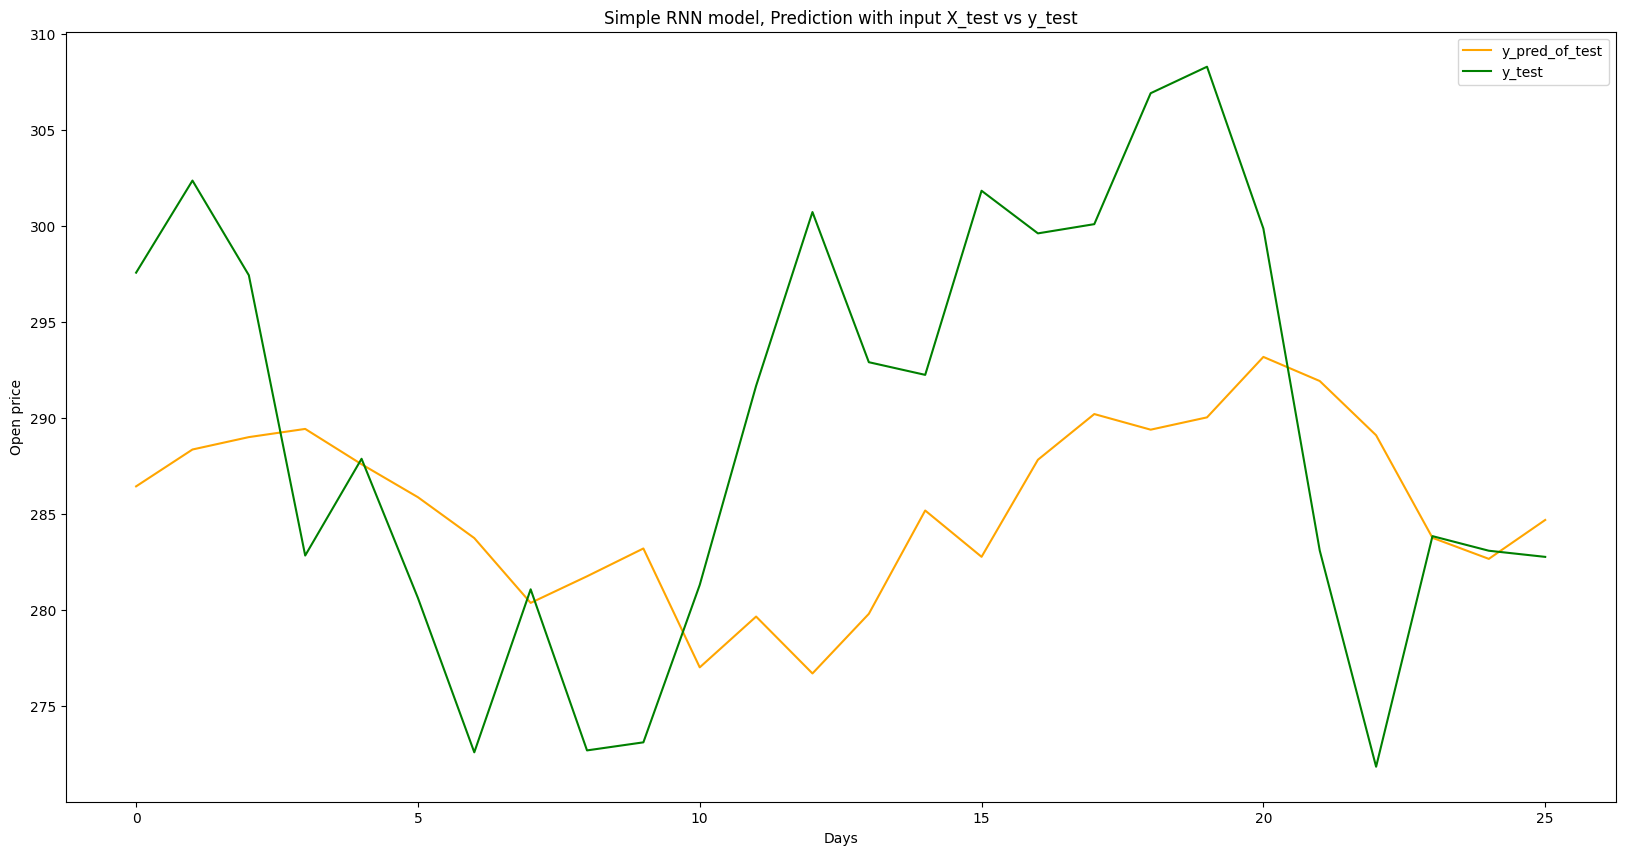

In [43]:
plt.figure(figsize = (20,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

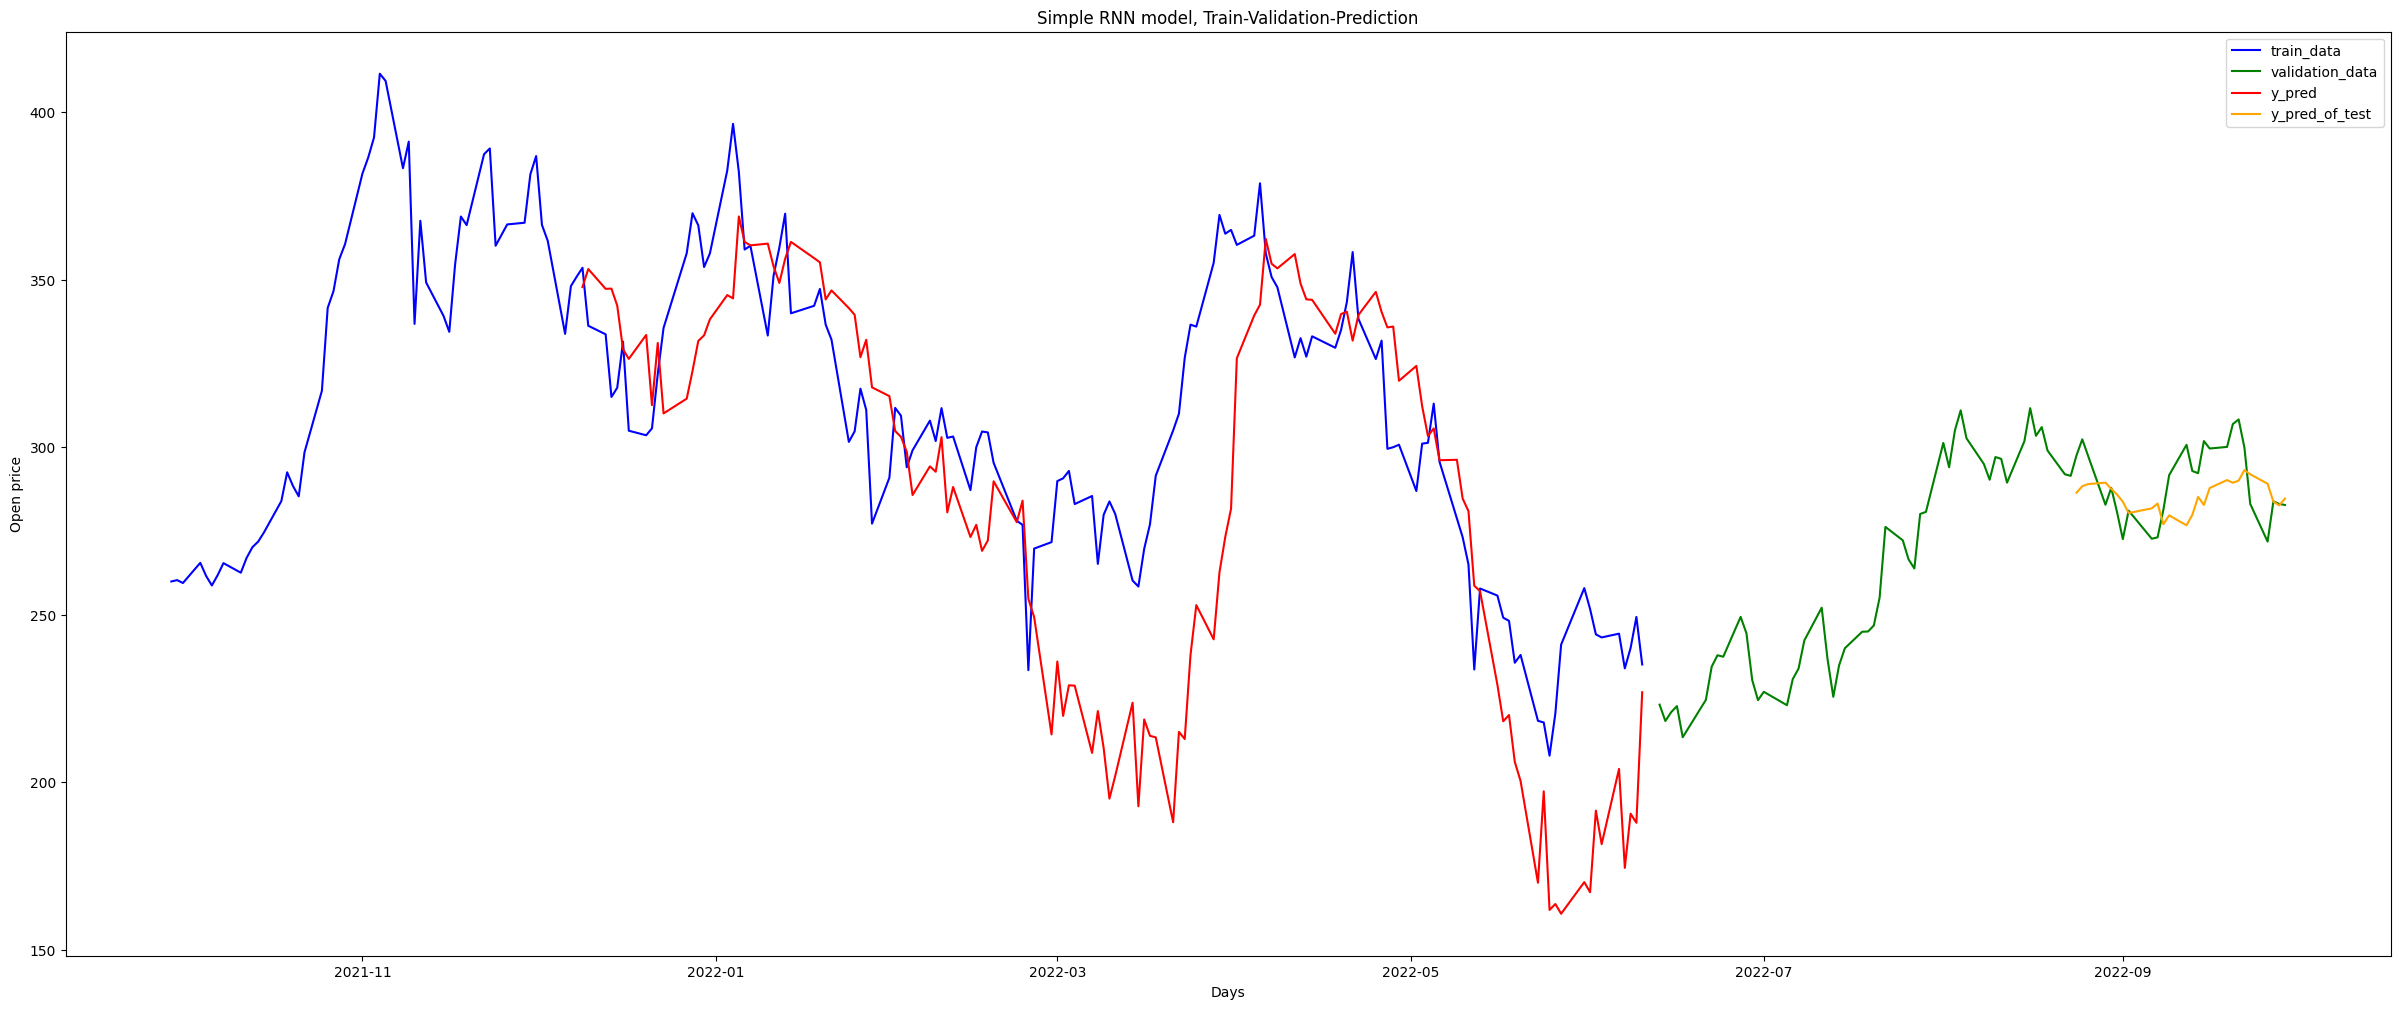

In [44]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

Creating LSTM Model

In [45]:
y_train = scaler.fit_transform(y_train)

In [46]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
13/13 [==============================] - 7s 42ms/step - loss: 0.0669 - accuracy: 0.0157
Epoch 2/10
13/13 [==============================] - 1s 39ms/step - loss: 0.0277 - accuracy: 0.0157
Epoch 3/10
13/13 [==============================] - 0s 38ms/step - loss: 0.0229 - accuracy: 0.0157
Epoch 4/10
13/13 [==============================] - 1s 40ms/step - loss: 0.0205 - accuracy: 0.0157
Epoch 5/10
13/13 [==============================] - 1s 39ms/step - loss: 0.0186 - accuracy: 0.0157
Epoch 6/10
13/13 [==============================] - 1s 39ms/step - loss: 0.0186 - accuracy: 0.0157
Epoch 7/10
13/13 [==============================] - 1s 39ms/step - loss: 0.0149 - accuracy: 0.0157
Epoch 8/10
13/13 [==============================] - 1s 40ms/step - loss: 0.0156 - accuracy: 0.0157
Epoch 9/10
13/13 [==============================] - 1s 39ms/step - loss: 0.0134 - accuracy: 0.0157
Epoch 10/10
13/13 [==============================] - 1s 41ms/step - loss: 0.0136 - accuracy: 0.0157


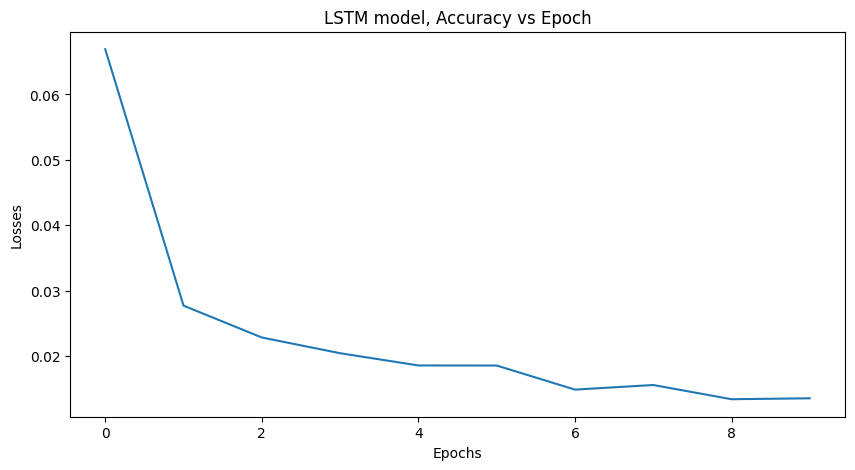

In [47]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

1/1 [==============================] - 1s 791ms/step


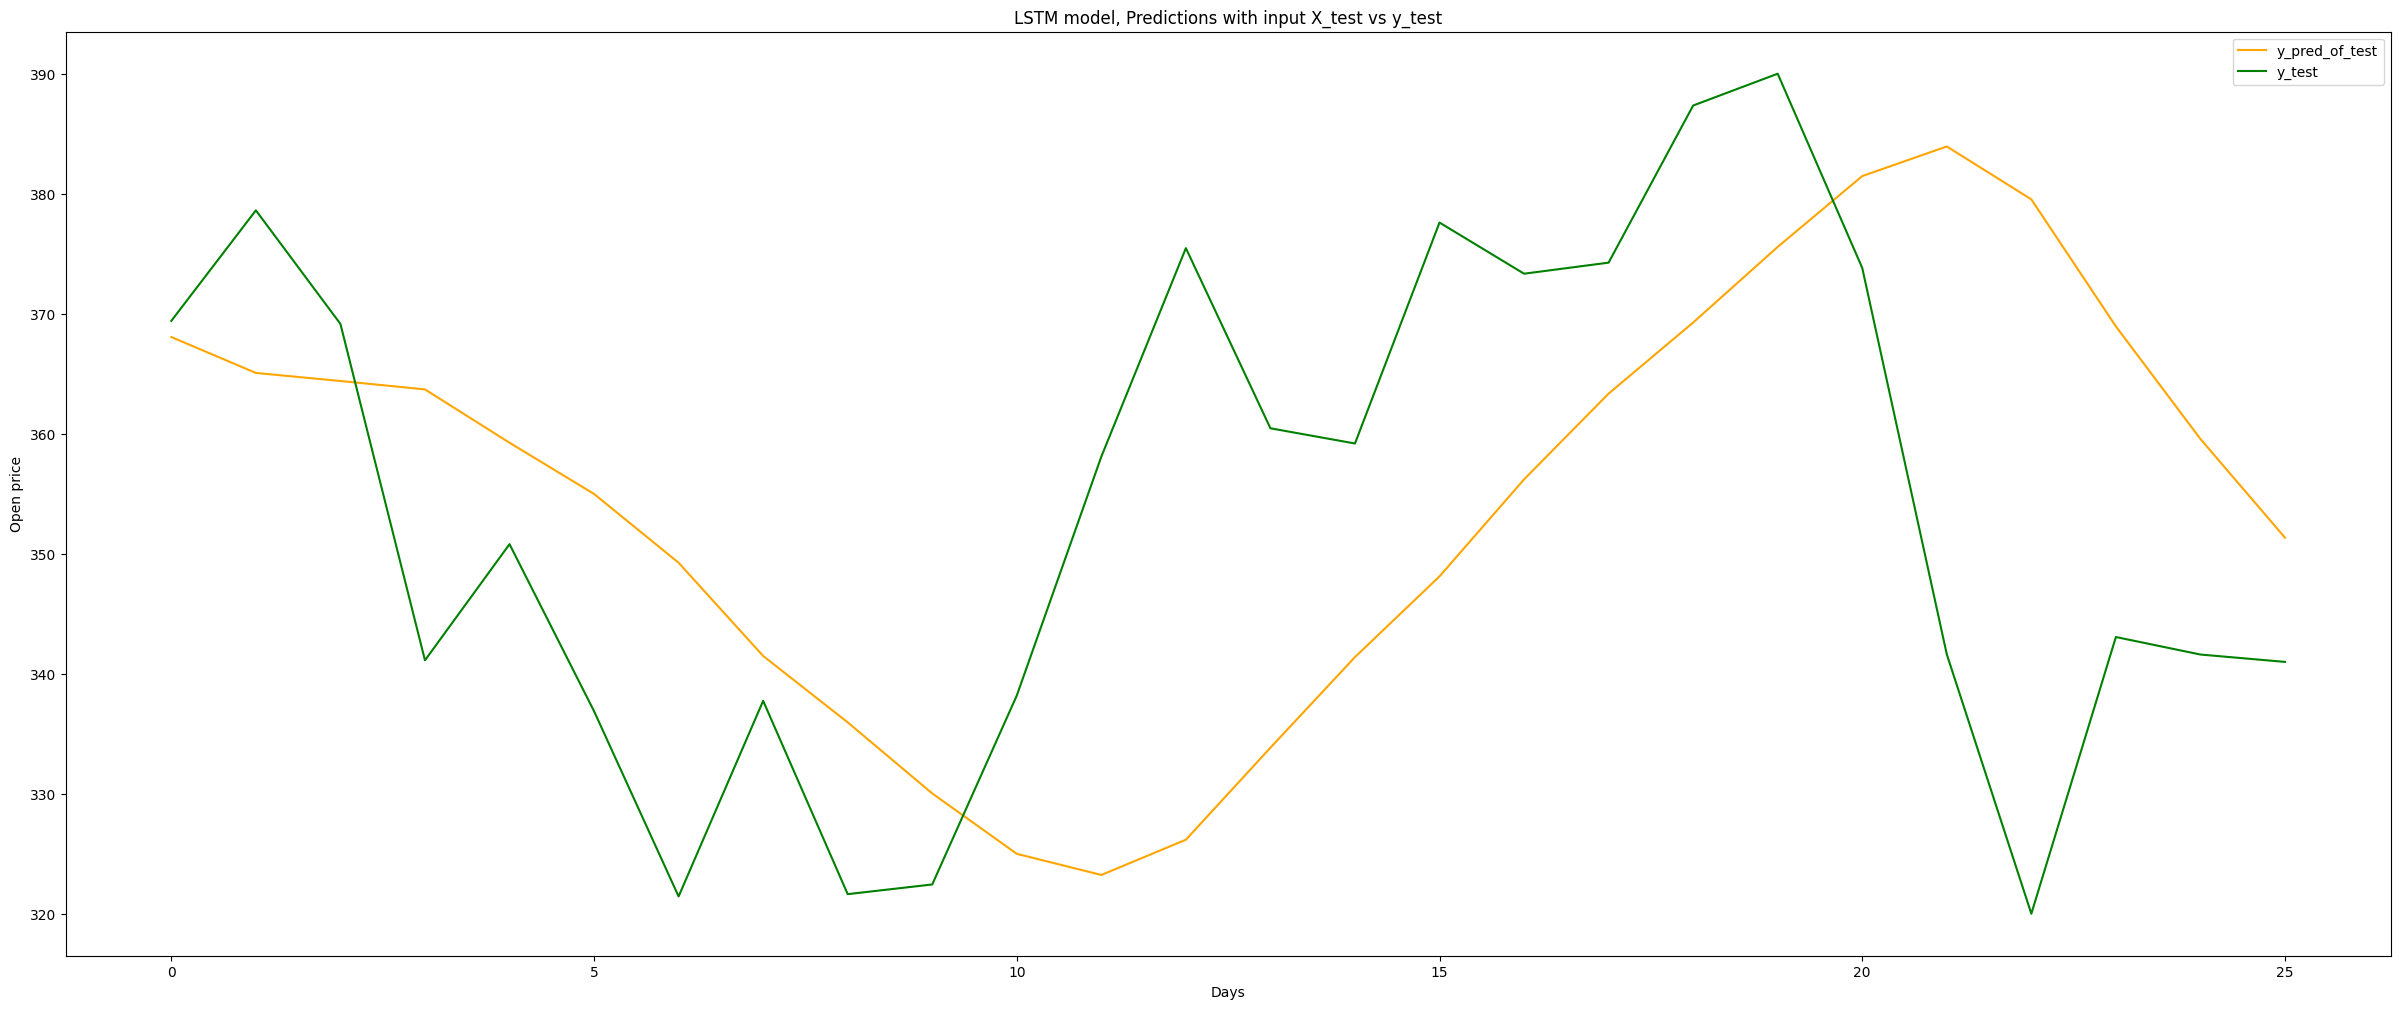

In [48]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [49]:
data.iloc[-1]

Date         2022-09-29
Open          282.76001
High         283.649994
Low          265.779999
Close        268.209991
Adj Close    268.209991
Volume         77393100
Name: 252, dtype: object

In [50]:
X_input = data.iloc[-time_step:].Open.values
X_input = scaler.fit_transform(X_input.reshape(-1,1))
X_input = np.reshape(X_input, (1,50,1))
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.37329091],
        [0.30251072],
        [0.20167372],
        [0.15387777],
        [0.44130154],
        [0.45249905],
        [0.8163015 ],
        [0.68770623],
        [0.88213122],
        [0.98821329],
        [0.84093625],
        [0.70532777],
        [0.62211231],
        [0.7418674 ],
        [0.73208407],
        [0.60661232],
        [0.82531865],
        [1.        ],
        [0.85378374],
        [0.89981157],
        [0.77604915],
        [0.65075438],
        [0.64262158],
        [0.75064822],
        [0.83545485],
        [0.74829089],
        [0.49015774],
        [0.57926682],
        [0.45108432],
        [0.3089342 ],
        [0.45904069],
        [0.31070234],
        [0.31812832],
        [0.46310683],
        [0.64645245],
        [0.80645936],
        [0.66819894],
        [0.65652984],
        [0.8260843 ],
        [0.7868339 ],
        [0.79532066],
        [0.91590075],
        [0.94029972],
        [0.79125398],
        [0

In [51]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 27ms/step
Simple RNN, Open price prediction for 3/18/2017      : 285.45142
LSTM prediction, Open price prediction for 3/18/2017 : 286.9713
